# __Predicting Outcomes of Call Option Contracts with Deep Learning__

# SECTION 1: Preparation

##  1.1.) Loading the Python packages

In [1]:
import xgboost as xgb

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pylab as plt

# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path

# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#importing classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#from sklearn.metrics import balanced_accuracy_score
#from sklearn.metrics import confusion_matrix
#from imblearn.metrics import classification_report_imbalanced

#Libraries for Deep Learning Models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

import warnings 
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import tensorflow
from scikeras.wrappers import KerasClassifier, KerasRegressor


## 1.2.) Loading the Data

In [2]:
# Read in the options contract csv file from the Resources folder into a Pandas DataFrame

iris = datasets.load_iris()

In [3]:
X = iris.data

y = iris.target

validation_size = 0.2

seed = 7


## 2.2.) Train Test Split and Evaluation Metrics

In [4]:
#Split into training and testing groups

validation_size = 0.2

seed = 7

X_train, X_validation, y_train, y_validation = train_test_split(X, y, stratify=y, test_size=validation_size, random_state=seed)

In [5]:
#Normalize features data

#Create the StandardScaler instance

scaler = StandardScaler()

#Fit the scaler to the features training dataset

X_scaler = scaler.fit(X_train)

#Scale both the training and testing data from the features dataset

X_train_scaled = X_scaler.transform(X_train)
X_validation_scaled = X_scaler.transform(X_validation)

# SECTION 3: Establishing Sequential Model Baseline

## 3.1.) Creating Neural Network Architecture

In [6]:
#Define the the number of inputs (features) to the model

number_input_features = 4

#Review the number of features

number_input_features


4

In [7]:
#Define the number of neurons in the output layer

number_output_neurons = 3

In [8]:
#Define the number of hidden nodes for the first hidden layer

hidden_nodes_layer1 = (number_input_features + 1) // 2 

#Review the number hidden nodes in the first layer

hidden_nodes_layer1


2

In [9]:
#Define the number of hidden nodes for the second hidden layer

hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2 

# Review the number hidden nodes in the second layer

hidden_nodes_layer2


1

In [10]:
#Create the Sequential model instance

nn = Sequential()

2022-07-03 17:41:19.082578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Add the first hidden layer

nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [12]:
#Add the second hidden layer

nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [13]:
#Add the output layer to the model specifying the number of output neurons and activation function
#Using Softmax because of multi-class classification
#There are 3 outputs because we have 3 classes

nn.add(Dense(units=3, activation="softmax"))


In [14]:
#Display the Sequential model summary

nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


## 3.2.) Compiling Neural Network Architecture

In [15]:
#Compile the Sequential model
#Using Sparce Categorical Crossentropy because of multi-class classification

nn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [18]:
#Fit the model using 50 epochs and the training data

model_1 = nn.fit(X_train_scaled, y_train, epochs=800, validation_data=(X_validation_scaled, y_validation))#, verbose=0)


Epoch 1/800
4/4 [==============================] - 0s 12ms/step - loss: 0.2604 - accuracy: 0.9500 - val_loss: 0.2653 - val_accuracy: 1.0000
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.9500 - val_loss: 0.2645 - val_accuracy: 1.0000
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2596 - accuracy: 0.9500 - val_loss: 0.2639 - val_accuracy: 1.0000
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.9500 - val_loss: 0.2631 - val_accuracy: 1.0000
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.9500 - val_loss: 0.2624 - val_accuracy: 1.0000
Epoch 6/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.9500 - val_loss: 0.2619 - val_accuracy: 1.0000
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 0.2579 - accuracy: 0.9500 - val_loss: 0.2615 - val_accuracy: 1.0000
Epoch 8/800
4/4 [=========

## 3.3.) Evaluating the Model for Loss and Accuracy

In [19]:
#Create a DataFrame using the model history and an index parameter

model_plot = pd.DataFrame(model_1.history, index=range(1, len(model_1.history["loss"]) + 1))

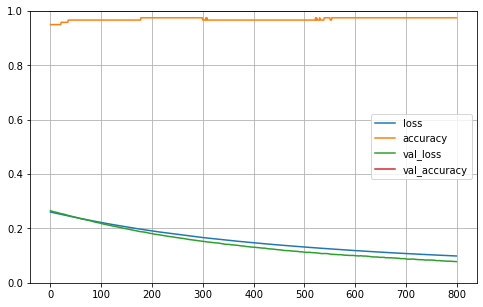

In [20]:
pd.DataFrame(model_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<AxesSubplot:title={'center':'Loss Function, Training'}>

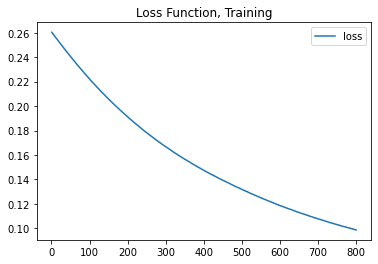

In [21]:
#Vizualize the model plot where the y-axis displays the loss metric

model_plot.plot(
    y="loss",
    title="Loss Function, Training",
    legend="Loss"
)

<AxesSubplot:title={'center':'Accuracy Function, Training'}>

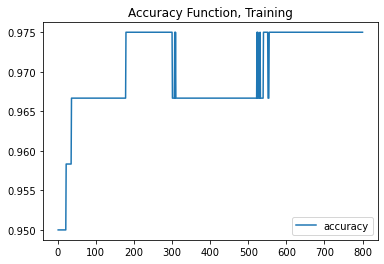

In [22]:
# Vizualize the model plot where the y-axis displays the accuracy metric

model_plot.plot(
    y="accuracy",
    title="Accuracy Function, Training",
    legend="Accuracy"
)

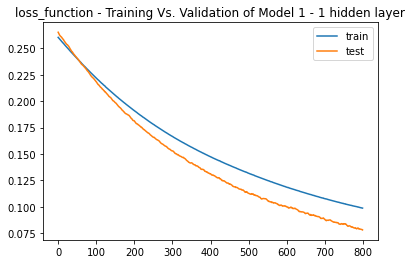

In [23]:
# Train versus validation loss to look for signs of overfitting

plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation of Model 1 - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [24]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the validation data

model_loss, model_accuracy = nn.evaluate(X_validation_scaled, y_validation, verbose=2)

# Display the model loss and accuracy results

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.0780 - accuracy: 1.0000 - 13ms/epoch - 13ms/step
Loss: 0.07799497991800308, Accuracy: 1.0


In [25]:
y_proba = nn.predict(X_validation_scaled)


1/1 [==============================] - 0s 59ms/step


In [26]:
proba_df = pd.DataFrame(y_proba.round(2))

In [27]:
proba_df["Actual"] = y_validation
proba_df.columns = ["'Strong Sell' Probability Estimate", "'Sell' Probability Estimate", "'Pass' Probability Estimate", "Actual"]
proba_df.head()

,'Strong Sell' Probability Estimate,'Sell' Probability Estimate,'Pass' Probability Estimate,Actual
0,0.00,0.29,0.71,2
1,0.96,0.04,0.00,0
2,0.96,0.04,0.00,0
3,0.00,0.87,0.13,1
4,0.00,0.05,0.95,2


In [28]:
proba_df.loc[proba_df["Actual"] == 0, "Actual"] = "Strong Sell"
proba_df.loc[proba_df["Actual"] == 1, "Actual"] = "Sell"
proba_df.loc[proba_df["Actual"] == 2, "Actual"] = "Pass"
proba_df.loc[proba_df["Actual"] == 1, "Actual"] = "Buy"
proba_df.loc[proba_df["Actual"] == 2, "Actual"] = "Strong Buy"

In [29]:
proba_df.head()

,'Strong Sell' Probability Estimate,'Sell' Probability Estimate,'Pass' Probability Estimate,Actual
0,0.00,0.29,0.71,Pass
1,0.96,0.04,0.00,Strong Sell
2,0.96,0.04,0.00,Strong Sell
3,0.00,0.87,0.13,Sell
4,0.00,0.05,0.95,Pass


# SECTION 4: Tuning the Sequential Model

## 4.1.) Creating Neural Network Architecture

In [30]:
def create_model():
    
    model=Sequential()
    model.add(Dense(2, input_dim=4, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [31]:
def algorithm_trial(X_train, X_validation, y_train, y_validation, 
                       model, param_grid, cv=10, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train, y_train)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_validation)
    else:
      pred = fitted_model.predict(X_validation)
    
    return fitted_model, pred

In [32]:
#Tuning batch size and number of epochs

param_grid = {
              'epochs':[600, 800, 1000, 1200],
              'batch_size': [12, 24, 32, 75, 100, 120],
             }
    
model = KerasClassifier(build_fn = create_model, verbose=0)

model, pred = algorithm_trial(X_train_scaled, X_validation_scaled, y_train, y_validation, model, 
                                        param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


2022-07-03 17:43:19.518223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-03 17:43:19.518243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-03 17:43:19.518290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

0.9
{'batch_size': 12, 'epochs': 1000}


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END .........................batch_size=12, epochs=1000; total time=  20.5s
[CV] END ..........................batch_size=24, epochs=800; total time=  10.0s
[CV] END ..........................batch_size=32, epochs=600; total time=   7.3s
[CV] END .........................batch_size=32, epochs=1000; total time=  10.5s
[CV] END ..........................batch_size=75, epochs=800; total time=   6.8s
[CV] END .........................batch_size=75, epochs=1200; total time=   9.8s
[CV] END ........................batch_size=100, epochs=1200; total time=   6.5s
[CV] END ..........................batch_size=12, epochs=800; total time=  16.6s
[CV] END ..........................batch_size=24, epochs=600; total time=   7.5s
[CV] END .........................batch_size=24, epochs=1000; total time=  12.9s
[CV] END ..........................batch_size=32, epochs=800; total time=   8.7s
[CV] END ..........................batch_size=75, epochs=600; total time=   5.6s
[CV] END ...................

/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrap

[CV] END ..........................batch_size=12, epochs=600; total time=  13.0s
[CV] END .........................batch_size=12, epochs=1200; total time=  42.2s
[CV] END .........................batch_size=75, epochs=1200; total time=   9.6s
[CV] END ........................batch_size=100, epochs=1200; total time=   6.6s
[CV] END ..........................batch_size=12, epochs=800; total time=  16.6s
[CV] END ..........................batch_size=24, epochs=600; total time=   7.5s
[CV] END .........................batch_size=24, epochs=1200; total time=  15.1s
[CV] END .........................batch_size=32, epochs=1000; total time=  10.6s
[CV] END ..........................batch_size=75, epochs=800; total time=   6.7s
[CV] END .........................batch_size=100, epochs=600; total time=   4.3s
[CV] END ........................batch_size=100, epochs=1000; total time=   6.2s
[CV] END .........................batch_size=120, epochs=800; total time=   5.0s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END .........................batch_size=12, epochs=1000; total time=  21.9s
[CV] END ..........................batch_size=24, epochs=800; total time=  10.6s
[CV] END ..........................batch_size=32, epochs=600; total time=   7.3s
[CV] END .........................batch_size=32, epochs=1000; total time=  10.6s
[CV] END ..........................batch_size=75, epochs=800; total time=   6.9s
[CV] END .........................batch_size=100, epochs=600; total time=   4.3s
[CV] END ........................batch_size=100, epochs=1000; total time=   6.1s
[CV] END .........................batch_size=120, epochs=800; total time=   4.8s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END ..........................batch_size=12, epochs=800; total time=  16.5s
[CV] END ..........................batch_size=24, epochs=600; total time=   7.5s
[CV] END .........................batch_size=24, epochs=1000; total time=  12.8s
[CV] END ..........................batch_size=32, epochs=800; total time=   8.5s
[CV] END .........................batch_size=32, epochs=1200; total time=  12.1s
[CV] END .........................batch_size=100, epochs=600; total time=   4.3s
[CV] END ........................batch_size=100, epochs=1000; total time=   6.1s
[CV] END .........................batch_size=120, epochs=800; total time=   4.7s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END .........................batch_size=12, epochs=1000; total time=  20.2s
[CV] END ..........................batch_size=24, epochs=800; total time=   9.9s
[CV] END .........................batch_size=24, epochs=1200; total time=  15.1s
[CV] END .........................batch_size=32, epochs=1200; total time=  12.1s
[CV] END .........................batch_size=100, epochs=600; total time=   4.5s
[CV] END ........................batch_size=100, epochs=1000; total time=   6.1s
[CV] END ........................batch_size=120, epochs=1000; total time=   5.3s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END ..........................batch_size=12, epochs=800; total time=  16.3s
[CV] END ..........................batch_size=24, epochs=600; total time=   7.3s
[CV] END .........................batch_size=24, epochs=1000; total time=  12.8s
[CV] END ..........................batch_size=32, epochs=600; total time=   6.9s
[CV] END .........................batch_size=32, epochs=1200; total time=  11.9s
[CV] END .........................batch_size=75, epochs=1200; total time=   9.6s
[CV] END .........................batch_size=120, epochs=600; total time=   3.9s
[CV] END ........................batch_size=120, epochs=1000; total time=   5.0s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END .........................batch_size=12, epochs=1200; total time=  23.8s
[CV] END .........................batch_size=24, epochs=1000; total time=  12.8s
[CV] END ..........................batch_size=32, epochs=600; total time=   6.8s
[CV] END .........................batch_size=32, epochs=1200; total time=  12.0s
[CV] END .........................batch_size=75, epochs=1200; total time=   9.6s
[CV] END .........................batch_size=120, epochs=600; total time=   3.9s
[CV] END ........................batch_size=120, epochs=1000; total time=   4.9s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END ..........................batch_size=12, epochs=600; total time=  13.1s
[CV] END .........................batch_size=12, epochs=1200; total time=  24.5s
[CV] END ..........................batch_size=32, epochs=800; total time=   8.7s
[CV] END ..........................batch_size=75, epochs=600; total time=   5.3s
[CV] END .........................batch_size=75, epochs=1000; total time=   8.1s
[CV] END .........................batch_size=100, epochs=800; total time=   5.3s
[CV] END .........................batch_size=120, epochs=600; total time=   3.8s
[CV] END ........................batch_size=120, epochs=1000; total time=   4.9s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END .........................batch_size=12, epochs=1000; total time=  20.2s
[CV] END ..........................batch_size=24, epochs=800; total time=  10.0s
[CV] END .........................batch_size=24, epochs=1200; total time=  15.1s
[CV] END .........................batch_size=32, epochs=1200; total time=  12.2s
[CV] END .........................batch_size=100, epochs=600; total time=   4.4s
[CV] END ........................batch_size=100, epochs=1200; total time=   7.0s
[CV] END ........................batch_size=120, epochs=1200; total time=   5.3s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END ..........................batch_size=12, epochs=800; total time=  16.7s
[CV] END ..........................batch_size=24, epochs=600; total time=   7.4s
[CV] END .........................batch_size=24, epochs=1200; total time=  14.9s
[CV] END .........................batch_size=32, epochs=1000; total time=  10.6s
[CV] END ..........................batch_size=75, epochs=800; total time=   6.6s
[CV] END .........................batch_size=75, epochs=1200; total time=   9.4s
[CV] END .........................batch_size=120, epochs=600; total time=   4.1s
[CV] END ........................batch_size=120, epochs=1200; total time=   4.9s
[CV] END .........................batch_size=12, epochs=1000; total time=  20.3s
[CV] END ..........................batch_size=24, epochs=800; total time=  10.0s
[CV] END .........................batch_size=24, epochs=1200; total time=  15.3s
[CV] END ..........................batch_size=75, epochs=600; total time=   5.5s
[CV] END ...................

/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrap

[CV] END ..........................batch_size=12, epochs=600; total time=  21.9s
[CV] END .........................batch_size=24, epochs=1000; total time=  12.8s
[CV] END ..........................batch_size=32, epochs=600; total time=   7.0s
[CV] END .........................batch_size=32, epochs=1000; total time=  10.1s
[CV] END .........................batch_size=75, epochs=1000; total time=   8.2s
[CV] END ........................batch_size=100, epochs=1000; total time=   5.8s
[CV] END .........................batch_size=120, epochs=800; total time=   5.2s
[CV] END ........................batch_size=120, epochs=1200; total time=   3.9s


/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


[CV] END ..........................batch_size=12, epochs=600; total time=  13.0s
[CV] END .........................batch_size=12, epochs=1200; total time=  24.2s
[CV] END ..........................batch_size=32, epochs=800; total time=   8.6s
[CV] END ..........................batch_size=75, epochs=600; total time=   5.5s
[CV] END .........................batch_size=75, epochs=1000; total time=   8.1s
[CV] END .........................batch_size=100, epochs=800; total time=   6.5s
[CV] END .........................batch_size=120, epochs=800; total time=   5.1s
[CV] END ........................batch_size=120, epochs=1200; total time=   3.8s
[CV] END ..........................batch_size=12, epochs=600; total time=  13.0s
[CV] END .........................batch_size=12, epochs=1200; total time=  24.4s
[CV] END ..........................batch_size=32, epochs=800; total time=   8.7s
[CV] END ..........................batch_size=75, epochs=600; total time=   5.4s
[CV] END ...................

/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


In [ ]:
#model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
model = keras.wrappers.scikit_learn.KerasClassifier(create_model)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(.0003, .03),
}

In [ ]:


random_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=10, cv=3)

random_search_cv.fit(X_train_scaled, y_train, epochs=100,
                     validation_data = (X_validation_scaled, y_validation),
                     callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
#Define the the number of inputs (features) to the model

number_input_features = 4

#Review the number of features

number_input_features


In [ ]:
#Define the number of neurons in the output layer

number_output_neurons = 5

In [ ]:
#Define the number of hidden nodes for the first hidden layer

hidden_nodes_layer1 = 4 

#Review the number hidden nodes in the first layer

hidden_nodes_layer1


In [ ]:
#Define the number of hidden nodes for the second hidden layer

hidden_nodes_layer2 = 3

# Review the number hidden nodes in the second layer

hidden_nodes_layer2


In [ ]:
#Define the number of hidden nodes for the third hidden layer

hidden_nodes_layer3 = 2

# Review the number hidden nodes in the second layer

hidden_nodes_layer3


In [ ]:
#Create the Sequential model instance

nn = Sequential()

In [ ]:
# Add the first hidden layer

nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [ ]:
#Add the second hidden layer

nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [ ]:
#Add the third hidden layer

nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

In [ ]:
#Add the output layer to the model specifying the number of output neurons and activation function
#Using Softmax because of multi-class classification

nn.add(Dense(units=5, activation="softmax"))


In [ ]:
#Display the Sequential model summary

nn.summary()


## 4.2.) Compiling Neural Network Architecture

In [ ]:
#Compile the Sequential model
#Using Sparce Categorical Crossentropy because of multi-class classification

nn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
#Fit the model using 50 epochs and the training data

model_2 = nn.fit(X_train_scaled, y_train, epochs=800)


## 4.3.) Evaluating the Model for Loss and Accuracy

In [ ]:
#Create a DataFrame using the model history and an index parameter

model_plot = pd.DataFrame(model_2.history, index=range(1, len(model_2.history["loss"]) + 1))

In [ ]:
#Vizualize the model plot where the y-axis displays the loss metric

model_plot.plot(
    y="loss",
    title="Loss Function, Training",
    legend="Loss"
)

In [ ]:
# Vizualize the model plot where the y-axis displays the accuracy metric

model_plot.plot(
    y="accuracy",
    title="Accuracy Function, Training",
    legend="Accuracy"
)

In [ ]:
# Train versus validation loss to look for signs of overfitting

plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation of Model 2 - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the validation data

model_loss, model_accuracy = nn.evaluate(X_validation_scaled, y_validation, verbose=2)

# Display the model loss and accuracy results

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
y_proba = model.predict(X_scaled_validation)
y_proba.round(2)

# SECTION 5: Comparing the Models


In [ ]:
#Comparing loss of both models

plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()